In [1]:
import array
from array import array
import matplotlib.pyplot as plt
import os

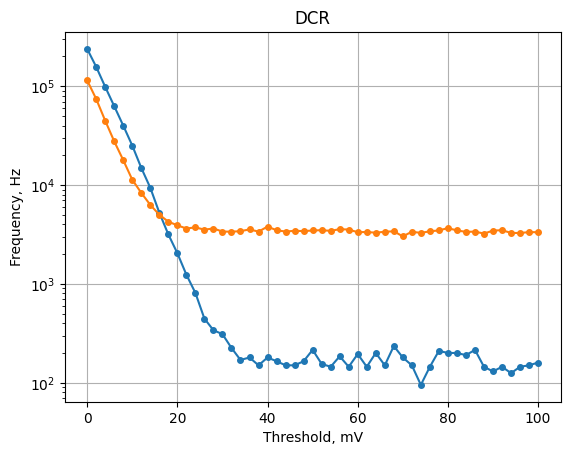

In [2]:
##Draw DCR staircase for spectrometr

##set up the correct directory name with data
#path = "DCR"
pathIn = "DCR28032023"
##W/o source
#fileName1 = "spectrometr53,98_DCR_gain40_BGO_wosource_staircase.txt"
fileName1 = "spectrometr53,98_DCR_gain_40_LYSO_staircase.txt"
##With source
#fileName2 = "spectrometr53,98_DCR_gain40_BGO_with137Cs_staircase.txt"
fileName2 = "spectrometr53,98_DCR_gain_40_LYSO_withEu_staircase.txt"

listFiles = [fileName1,fileName2] 

pathOut = 'results'
if not os.path.exists(pathOut):
    os.mkdir(pathOut)
#outFile = 'DCR_spectrometr.png'
outFile = 'DCR_spectrometr_LYSO_152Eu.png'
    
for fileName in listFiles:
    try:
        file = open(pathIn + "/" + fileName)
        trhU, freq = array( 'd' ), array( 'd' )
        for line in file.readlines():
            line = line.replace(',','.')
            b = line.split()
            trhU.append(float(b[0]))
            freq.append(float(b[1]))
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')
    
    plt.plot(trhU,freq, 'o', ls='-', ms=4)

plt.grid(True)
plt.yscale('log')
plt.xlabel('Threshold, mV')
plt.ylabel('Frequency, Hz')
plt.title('DCR')

plt.savefig(pathOut + '/' + outFile )
plt.show()